In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')
t1_champions = df[['winner', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5']]
t2_champions = df[['winner', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']]

In [3]:
win_champions = {}
ban_champions = {}
pick_champions = {}

for t in range(2):
    for i in range(5):
        win = 't' + str(t + 1) + '_champ' + str(i + 1) + 'id'
        for key, value in df[df['winner'] == (t + 1) & df[win]][win].value_counts().to_dict().items():
            if key in win_champions:
                win_champions[key] += value
            else:
                win_champions[key] = value

        ban = 't' + str(t + 1) + '_ban' + str(i + 1)
        for key, value in df[ban].value_counts().to_dict().items():
            if key in ban_champions:
                ban_champions[key] += value
            else:
                ban_champions[key] = value

        pick = 't' + str(t + 1) + '_champ' + str(i + 1) + 'id'
        for key, value in df[pick].value_counts().to_dict().items():
            if key in pick_champions:
                pick_champions[key] += value
            else:
                pick_champions[key] = value

In [4]:
with open('champion_info.json') as f:
    data_champion = json.load(f)['data']

In [5]:
win_labels = []
win_champs = []

for item in sorted(list(win_champions.items()), key=lambda x: x[1], reverse=True)[:10]:
    win_labels.append(data_champion[str(item[0])]['name'])
    win_champs.append(item[1])

ban_labels = []
ban_champs = []

for item in sorted(list(ban_champions.items()), key=lambda x: x[1], reverse=True)[:10]:
    ban_labels.append(data_champion[str(item[0])]['name'])
    ban_champs.append(item[1])

pick_labels = []
pick_champs = []

for item in sorted(list(pick_champions.items()), key=lambda x: x[1], reverse=True)[:10]:
    pick_labels.append(data_champion[str(item[0])]['name'])
    pick_champs.append(item[1])

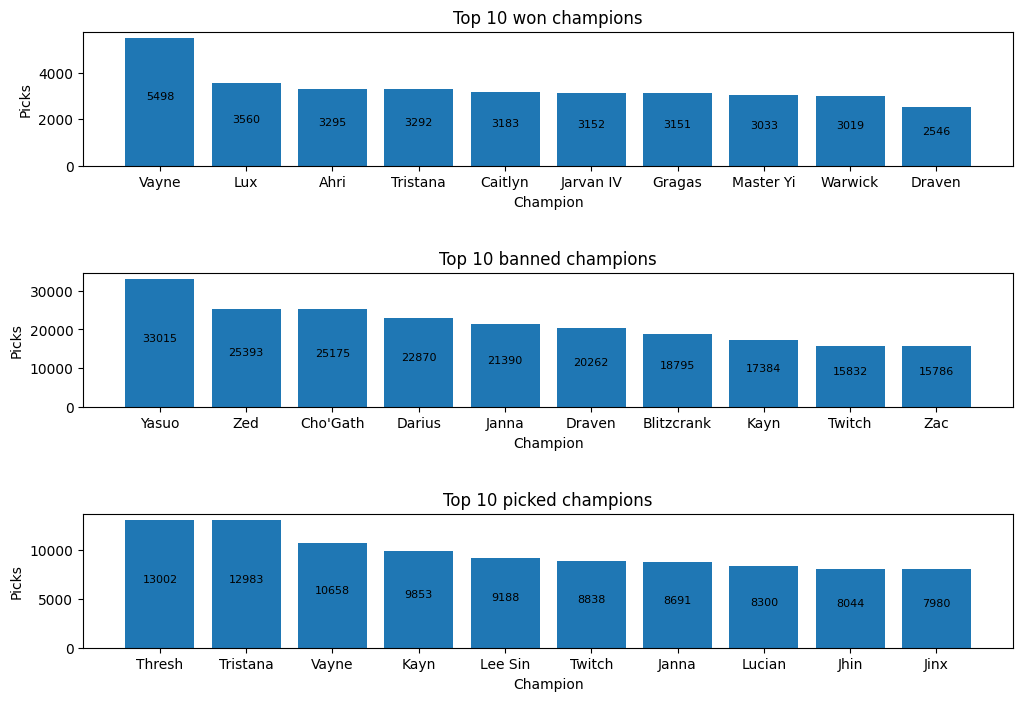

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(311)
win_bar = plt.bar(win_labels, win_champs)
for rect in win_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height / 2.0, height, ha='center', va='bottom', size=8)

plt.xlabel('Champion')
plt.ylabel('Picks')
plt.title("Top 10 won champions")

plt.subplot(312)
ban_bar = plt.bar(ban_labels, ban_champs)
for rect in ban_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height / 2.0, height, ha='center', va='bottom', size=8)

plt.xlabel('Champion')
plt.ylabel('Picks')
plt.title("Top 10 banned champions")

plt.subplot(313)
pick_bar = plt.bar(pick_labels, pick_champs)
for rect in pick_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height / 2.0, height, ha='center', va='bottom', size=8)

plt.xlabel('Champion')
plt.ylabel('Picks')
plt.title("Top 10 picked champions")

plt.subplots_adjust(hspace=0.8)
plt.show()

In [7]:
corr_result = df[['winner','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']].corr()['winner']
corr_result = corr_result.to_dict()

In [8]:
corr_labels = []
corr_values = []

for item in sorted(list(corr_result.items()), key=lambda x: x[1], reverse=True)[1:]:
    corr_labels.append(item[0])
    corr_values.append(item[1])

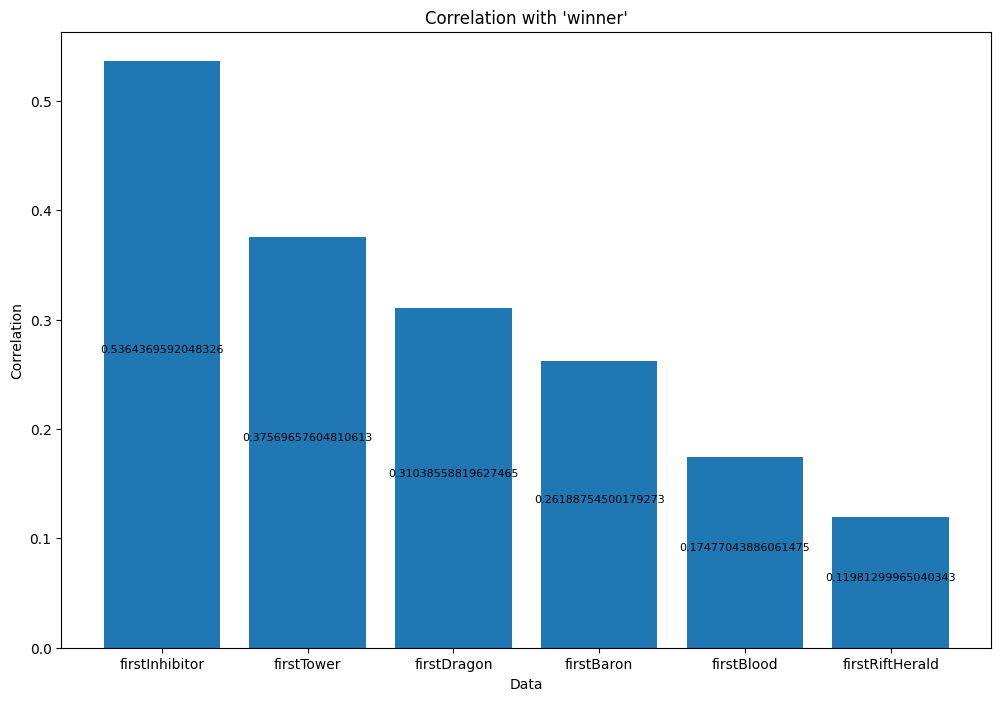

In [9]:
plt.figure(figsize=(12, 8))
corr_bar = plt.bar(corr_labels, corr_values)
for rect in corr_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height / 2.0, height, ha='center', va='bottom', size=8)

plt.xlabel('Data')
plt.ylabel('Correlation')
plt.title("Correlation with \'winner\'")
plt.show()